**Setting Up Library**

In [1]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for checking the model accuracy
from sklearn import metrics 

#To plot the graph embedded in the notebook
%matplotlib inline

**Loading Dataset**

In [2]:
Stroke_df = pd.read_csv('Stroke_Data.csv')
Stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Checking Information about Data**

In [3]:
Stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Droping Irrelevant Columns**

In [4]:
#Droping id Column
Stroke_df = Stroke_df.drop(Stroke_df.iloc[:,[0]], axis = 1)
Stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Dropping Duplicate Rows**

In [5]:
#Droping duplicate rows and printing updated Data Frame
Stroke_df.drop_duplicates(inplace= True)
Stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
Stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [7]:
Stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Printing Data by Group**

In [8]:
#Printing some important group size information
print(Stroke_df.groupby('gender').size(),"\n")
print(Stroke_df.groupby('hypertension').size(),"\n")
print(Stroke_df.groupby('heart_disease').size(),"\n")
print(Stroke_df.groupby('ever_married').size(),"\n")



gender
Female    2994
Male      2115
Other        1
dtype: int64 

hypertension
0    4612
1     498
dtype: int64 

heart_disease
0    4834
1     276
dtype: int64 

ever_married
No     1757
Yes    3353
dtype: int64 



In [9]:
#Printing some important group size information
print(Stroke_df.groupby('work_type').size(),"\n")
print(Stroke_df.groupby('Residence_type').size(),"\n")
print(Stroke_df.groupby('smoking_status').size(),"\n")
print(Stroke_df.groupby('stroke').size(),"\n")


work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
dtype: int64 

Residence_type
Rural    2514
Urban    2596
dtype: int64 

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64 

stroke
0    4861
1     249
dtype: int64 



**Finding Null Values**

In [10]:
#Finding the sum of null value in each column
Stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#Finding the percentage of null value in each column
Stroke_df.isnull().sum()/len(Stroke_df)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [12]:
Stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Droping Rows with Null Value**

In [13]:
#Droping Null Value and loading Updated Dataset
Stroke_df = Stroke_df.dropna()
Stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
print(Stroke_df.groupby('gender').size(),"\n")

gender
Female    2897
Male      2011
Other        1
dtype: int64 



**Removing Outlier**

In [15]:
#removing one row that has Other gender
for i in Stroke_df.index:
    if Stroke_df.loc[i,'gender']=='Other':
        Stroke_df.drop(i,inplace=True)

/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_8384/105731938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stroke_df.drop(i,inplace=True)


In [16]:
print(Stroke_df.groupby('gender').size(),"\n")

gender
Female    2897
Male      2011
dtype: int64 



In [17]:
Stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Count Plot**

<AxesSubplot: xlabel='stroke', ylabel='count'>

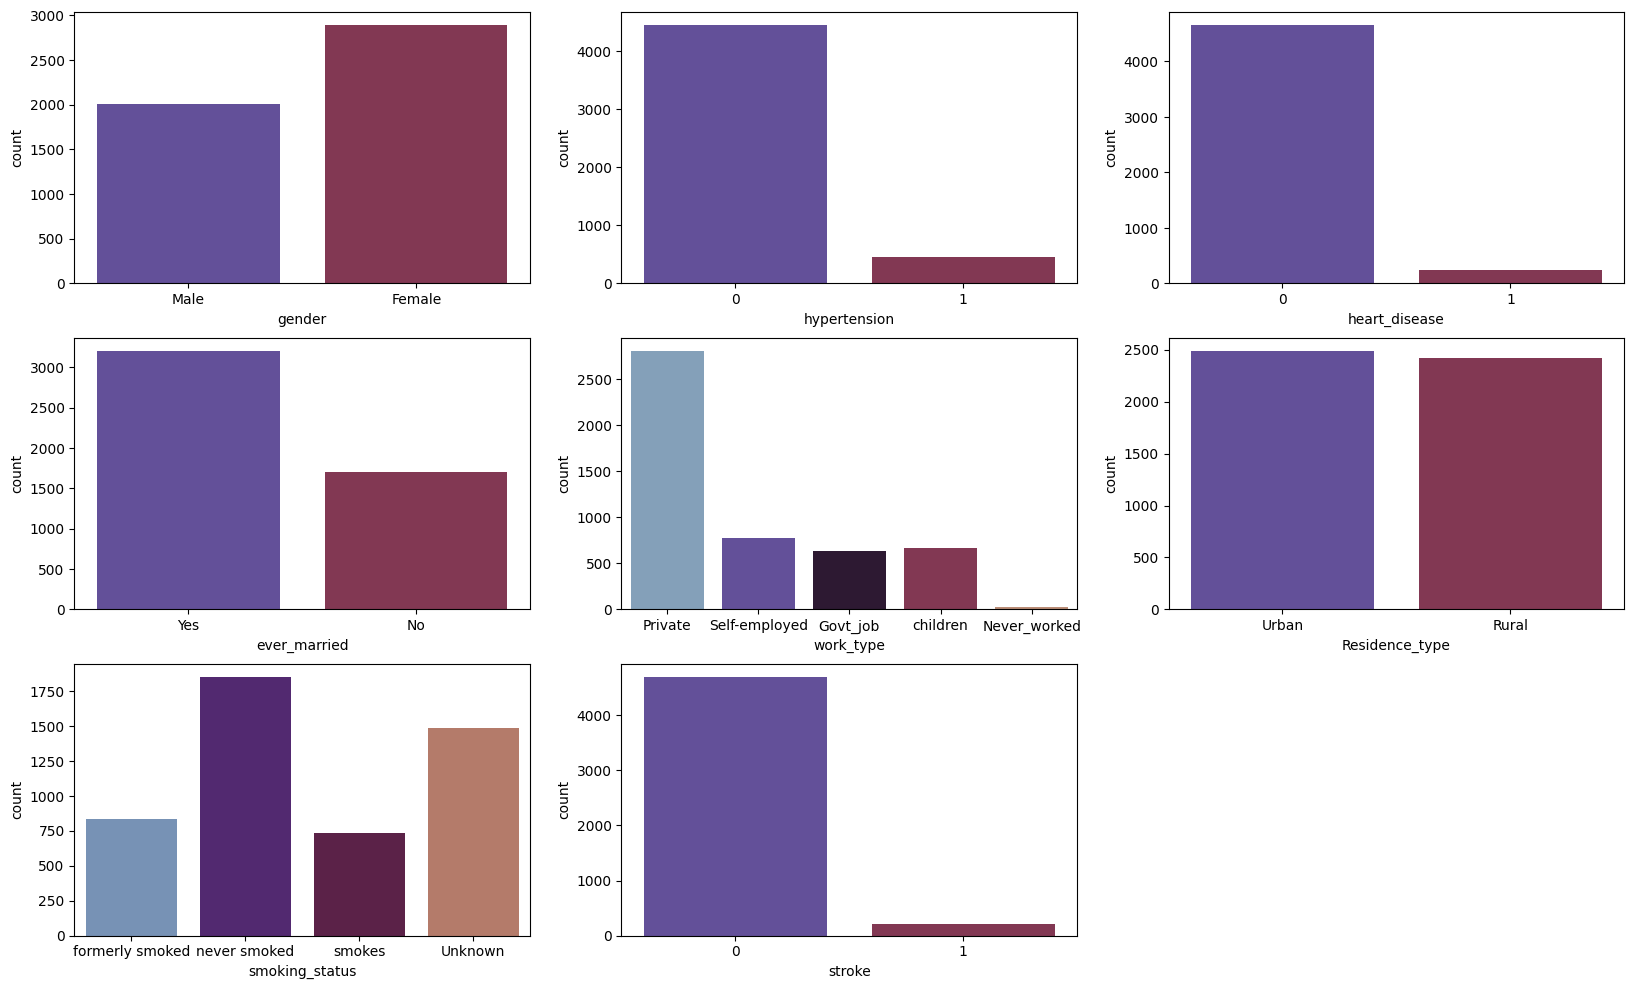

In [18]:
#Count Plot
plt.figure(figsize=(20,12))

plt.subplot(3, 3, 1)
sns.countplot(data=Stroke_df,x='gender',palette='twilight')
plt.subplot(3, 3, 2)
sns.countplot(data=Stroke_df,x='hypertension',palette='twilight')
plt.subplot(3, 3, 3)
sns.countplot(data=Stroke_df,x='heart_disease',palette='twilight')
plt.subplot(3, 3, 4)
sns.countplot(data=Stroke_df,x='ever_married',palette='twilight')
plt.subplot(3, 3, 5)
sns.countplot(data=Stroke_df,x='work_type',palette='twilight')
plt.subplot(3, 3, 6)
sns.countplot(data=Stroke_df,x='Residence_type',palette='twilight')
plt.subplot(3, 3, 7)
sns.countplot(data=Stroke_df,x='smoking_status',palette='twilight')
plt.subplot(3, 3, 8)
sns.countplot(data=Stroke_df,x='stroke',palette='twilight')

**Distribution Plot**

<Figure size 1700x800 with 0 Axes>

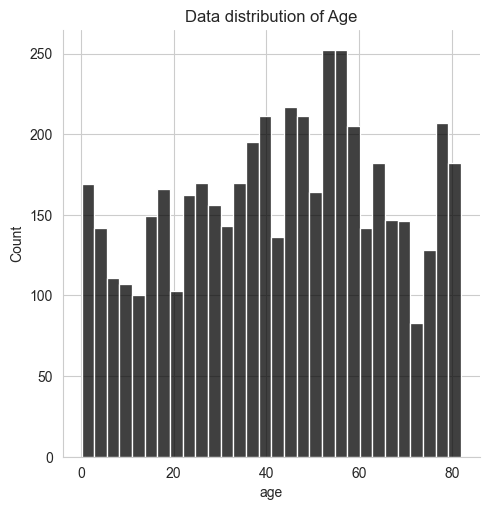

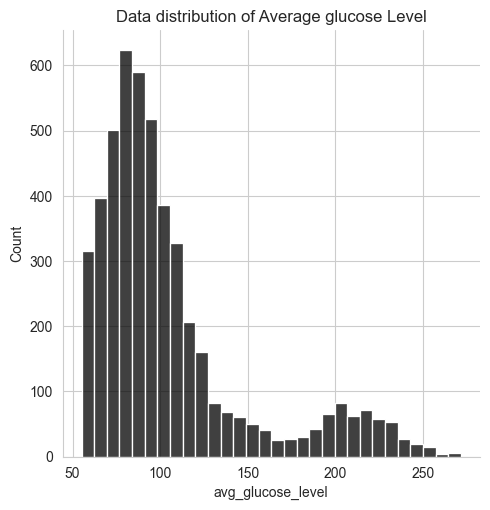

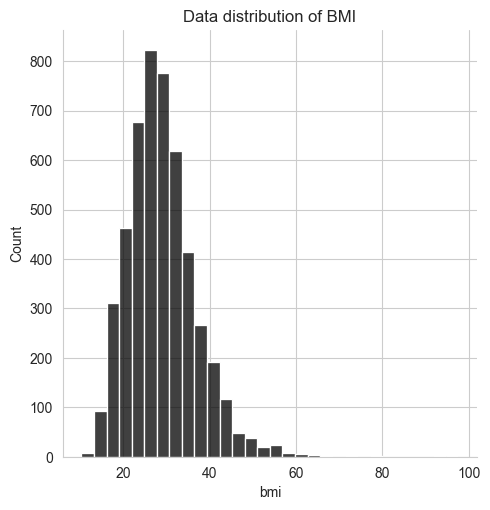

In [19]:
#Distribution Plot of Age and Flight Distance
sns.set_style ('whitegrid')
plt.figure(figsize=(17,8))

sns.displot(Stroke_df['age'], bins=30, color='black')
plt.title("Data distribution of Age");

sns.displot(Stroke_df['avg_glucose_level'], bins=30, color='black')
plt.title("Data distribution of Average glucose Level");

sns.displot(Stroke_df['bmi'], bins=30, color='black')
plt.title("Data distribution of BMI");


**Pair Plot**

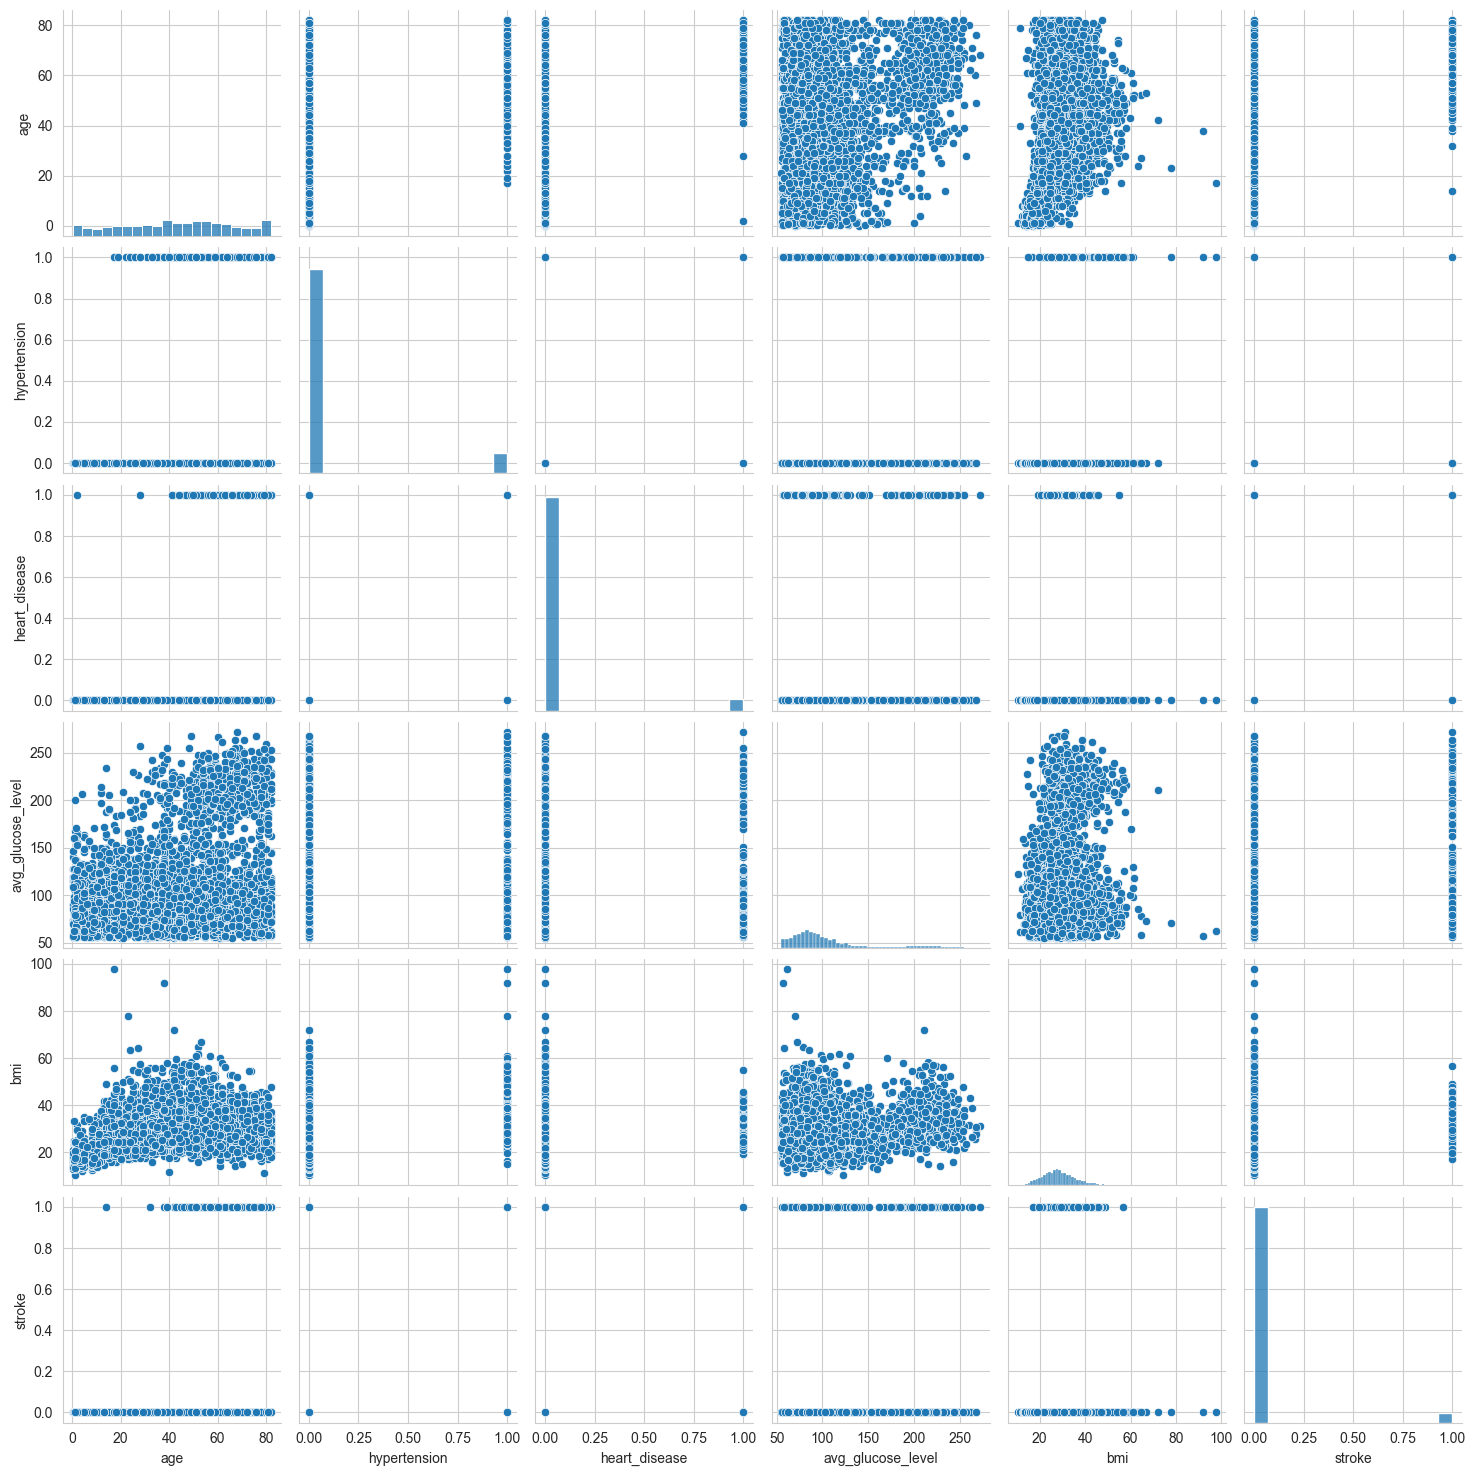

In [20]:
#Pair Plot of the colums
sns.pairplot(data=Stroke_df)

**Current Shape and Columns of the Data Frame**

In [21]:
#Printing Shape and Column of Data Frame
print('Shape: ',Stroke_df.shape)
print('Columns: ',Stroke_df.columns)

Shape:  (4908, 11)
Columns:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


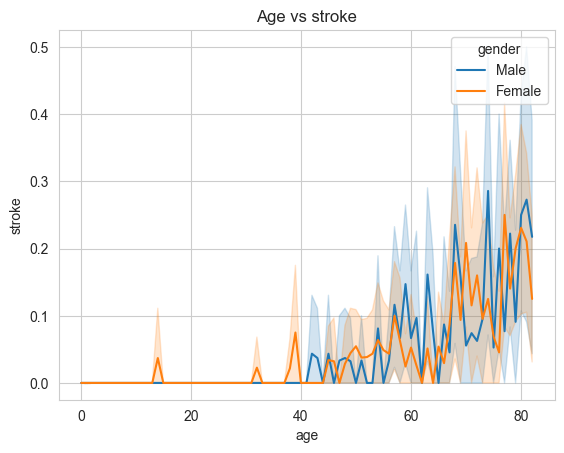

In [22]:
#age vs stroke
sns.lineplot(x="age", y="stroke",hue='gender' ,data=Stroke_df)

# Setting title of the plot
plt.title("Age vs stroke");

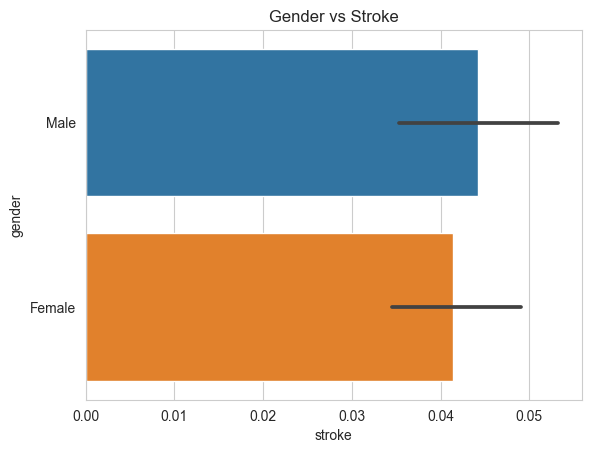

In [23]:
sns.barplot(y=Stroke_df['gender'], x=Stroke_df['stroke'])
plt.title("Gender vs Stroke");

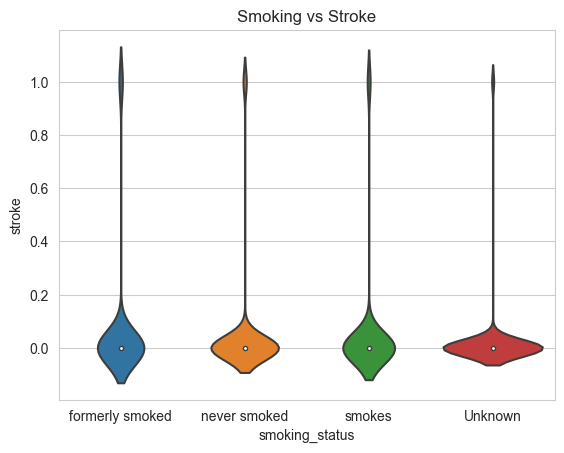

In [24]:
sns.violinplot(x="smoking_status",y="stroke",data=Stroke_df)
plt.title("Smoking vs Stroke");

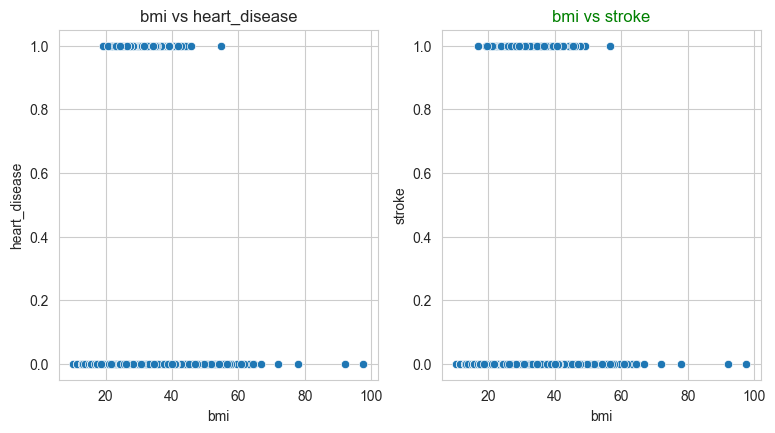

In [25]:
# Let's create plots to see the relationships
# between feature variables and target varable
plt.figure(figsize=(14,10))

# Relatiosnship in bmi vs heart_disease
plt.subplot(2, 3, 1)
sns.scatterplot(x=Stroke_df['bmi'], y=Stroke_df['heart_disease'])
plt.title("bmi vs heart_disease");

# Relatiosnship in bmi vs stroke
plt.subplot(2, 3, 2)
sns.scatterplot(x=Stroke_df['bmi'], y=Stroke_df['stroke'])
plt.title("bmi vs stroke", color='green');

**Replacing String Value with Integer**

In [26]:
#Replacing String Value with integer and printing updated Dataset ever_married
Stroke_df['gender'] = Stroke_df['gender'].replace(['Female','Male'], [0,1])
Stroke_df['ever_married'] = Stroke_df['ever_married'].replace(['No','Yes'], [0,1])
Stroke_df['work_type'] = Stroke_df['work_type'].replace(['Govt_job','Never_worked','Private','Self-employed','children'], [0,1,2,3,4])
Stroke_df['Residence_type'] = Stroke_df['Residence_type'].replace(['Rural','Urban'], [0,1])
Stroke_df['smoking_status'] = Stroke_df['smoking_status'].replace(['formerly smoked','never smoked','smokes','Unknown'], [0,1,2,3])
Stroke_df

/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_8384/2818760304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stroke_df['gender'] = Stroke_df['gender'].replace(['Female','Male'], [0,1])
/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_8384/2818760304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stroke_df['ever_married'] = Stroke_df['ever_married'].replace(['No','Yes'], [0,1])
/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_8384/2818760304.py:4: SettingWithCopyWar

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,3,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


**correlation Matrix**

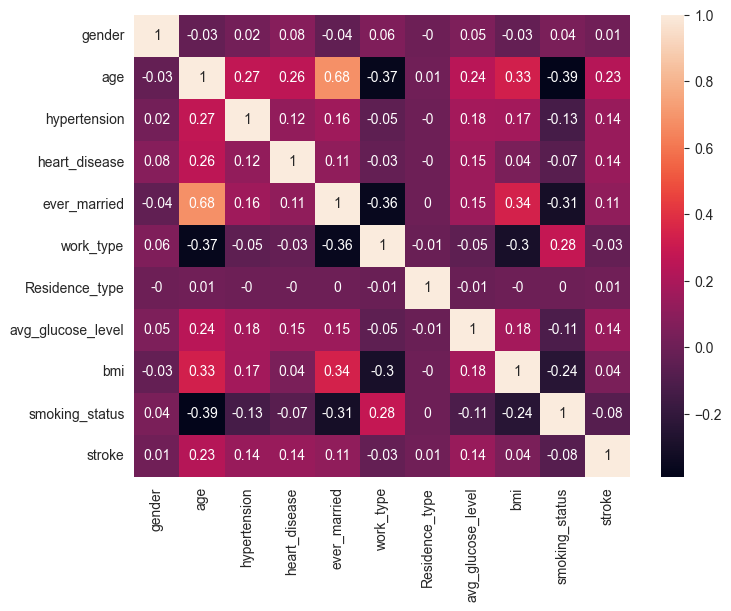

In [27]:
# corr() to calculate the correlation between variables
correlation_matrix = Stroke_df.corr().round(2)
# changing the figure size
plt.figure(figsize = (8, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

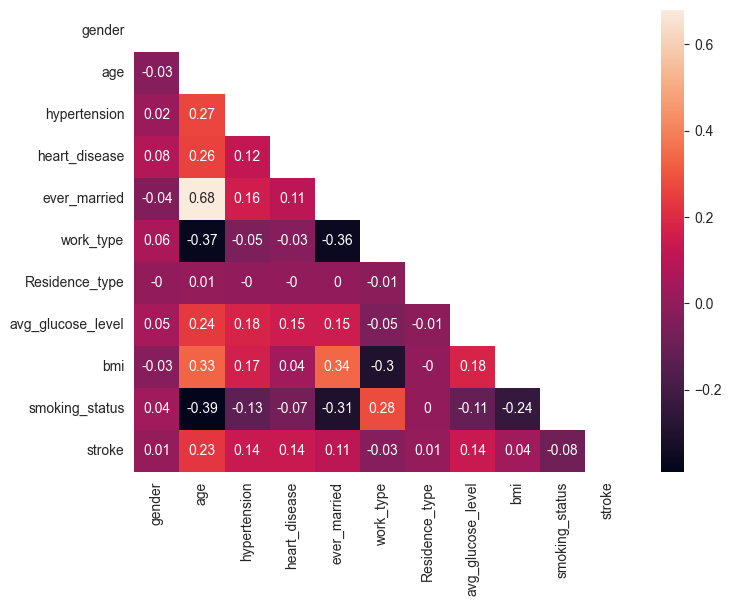

In [28]:
# corr() to calculate the correlation between variables
correlation_matrix = Stroke_df.corr().round(2)
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (8, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

**Paraller Co-ordinates**

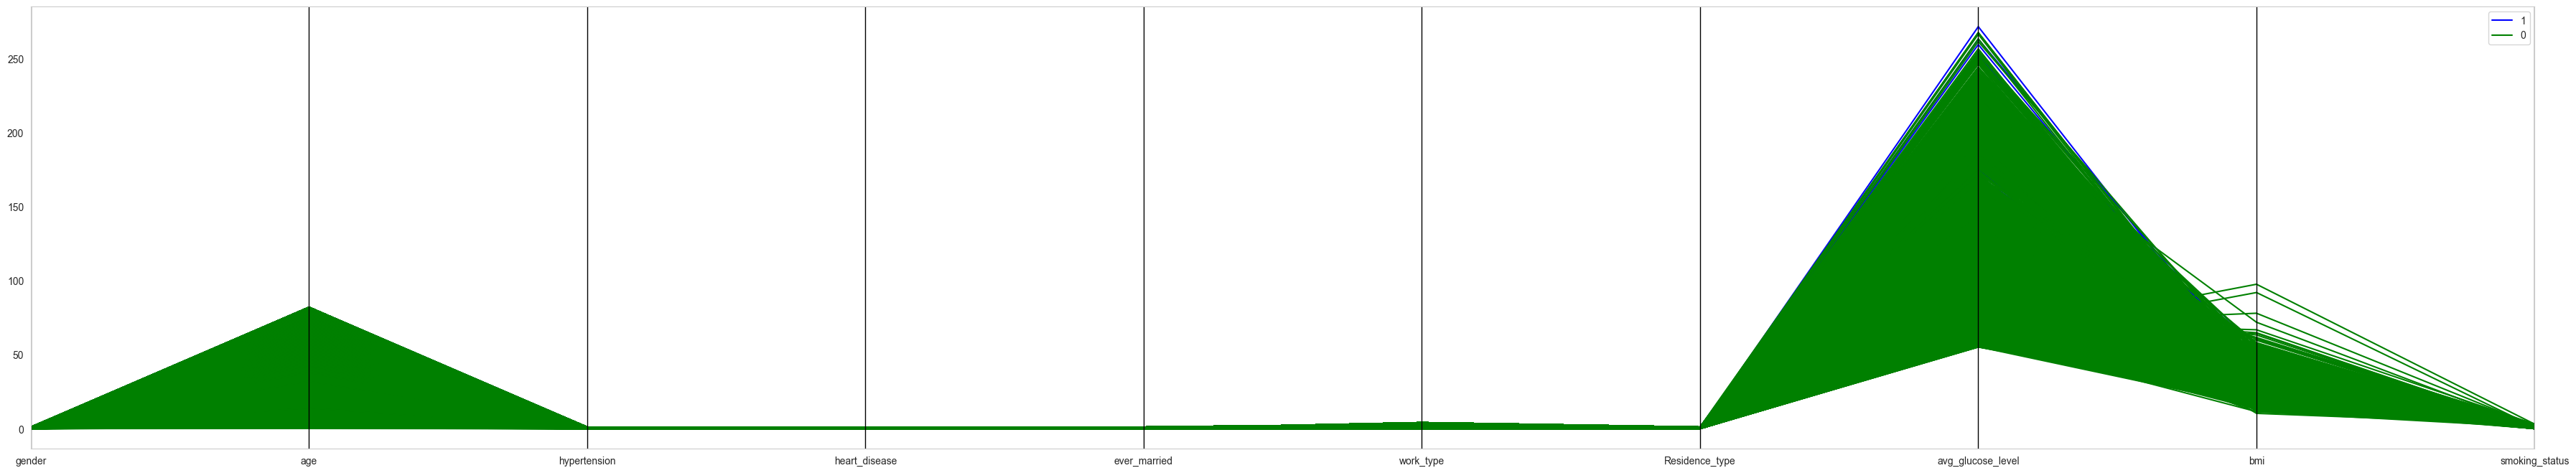

In [29]:
#Ploting Parallel cordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (45, 8))
parallel_coordinates(Stroke_df, "stroke", color = ['blue', 'green']);

**Create Features Matrix & Target Variable**

In [30]:
#Feature matrix

X = Stroke_df[['gender','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']]
X



,gender,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,1,0,1,228.69,36.6,0
2,1,0,1,105.92,32.5,1
3,0,0,0,171.23,34.4,2
4,0,1,0,174.12,24.0,1
5,1,0,0,186.21,29.0,0
...,...,...,...,...,...,...
5104,0,0,0,103.08,18.6,3
5106,0,0,0,125.20,40.0,1
5107,0,0,0,82.99,30.6,1
5108,1,0,0,166.29,25.6,0


In [31]:
#Target Variable
y= Stroke_df['stroke']
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4908, dtype: int64

**Spliting the Dataset**

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print("Feature train shape: ", X_train.shape)
print("Feature test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Feature train shape:  (3435, 6)
Feature test shape:  (1473, 6)
Target train shape:  (3435,)
Target test shape:  (1473,)


**Create Model: Support Vector Machine (SVM)**

In [33]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset

y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9586
----------------------------------


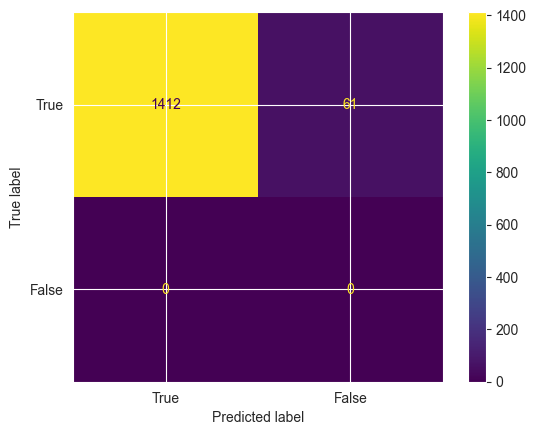

In [47]:
#Confusion Matrix for Support Vector Machine
confusion_matrix = metrics.confusion_matrix(y_prediction_svm, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()

**Create Model: Decision Tree (DT)**

In [35]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.924
---------------------------------


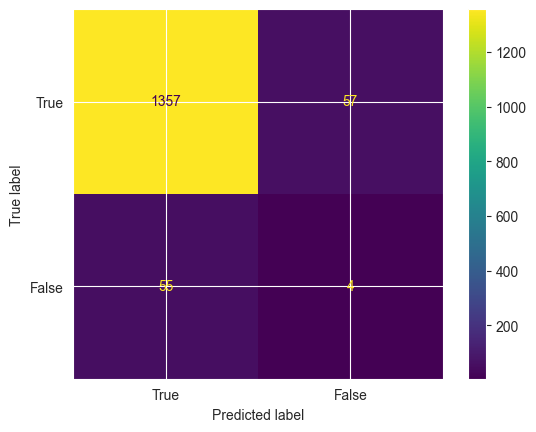

In [48]:
#Confusion Matrix for Decision Tree
confusion_matrix = metrics.confusion_matrix(y_prediction_dt, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()

**Create Model: K Nearest Neighbours (KNN)**

In [37]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9532
----------------------------------


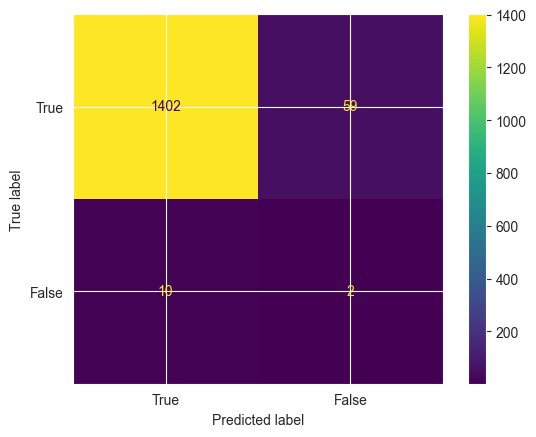

In [49]:
#Confusion Matrix for K Nearest Neighbour
confusion_matrix = metrics.confusion_matrix(y_prediction_knn, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()

**Create Model: Logistic Regression**

In [39]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9586
---------------------------------


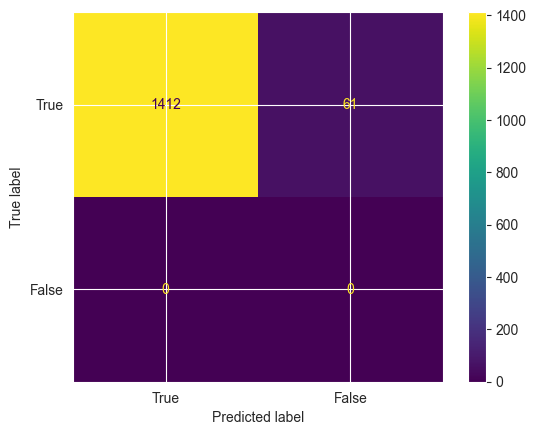

In [50]:
#Confusion Matrix for Logistic Regression
confusion_matrix = metrics.confusion_matrix(y_prediction_lr, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()

**Create Model: Naive Bayes**

In [41]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8968
---------------------------------


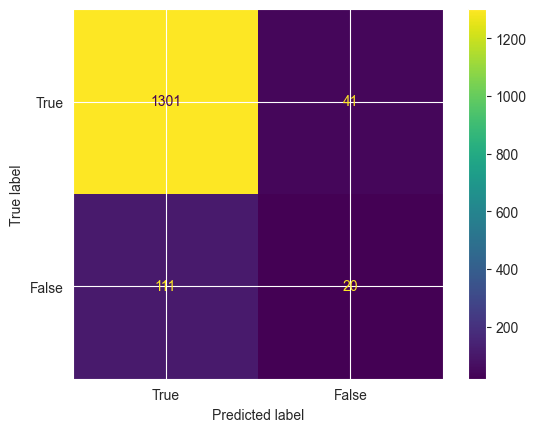

In [51]:
#Confusion Matrix for Naive Bayes Model
confusion_matrix = metrics.confusion_matrix(y_prediction_nb, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()

**Acurrecy of Five Different Machine Learning Model**

In [43]:
#Printing the accurecy of 5 different models from score set using for loop
print("The accuracy scores of different Models:")
print("----------------------------------------")

for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('LR', 0.9586)
('NB', 0.8968)
('DT', 0.924)
('SVM', 0.9586)
('KNN', 0.9532)


In [44]:
#Inserting the score into a dataset and arrenging it in assending order
accuracy_df = pd.DataFrame(score)
accuracy_df.rename(columns = {0:'Model',1:'Accuracy'}, inplace = True)
accuracy_df = accuracy_df.sort_values('Accuracy')
accuracy_df


,Model,Accuracy
1,NB,0.8968
2,DT,0.9240
4,KNN,0.9532
0,LR,0.9586
3,SVM,0.9586


Text(0.5, 1.0, 'Model Vs Accuracy')

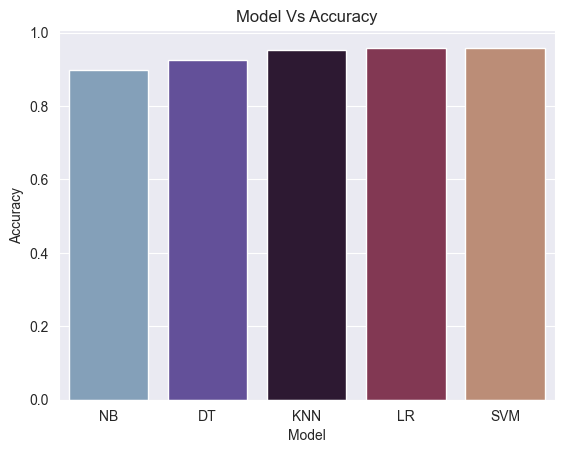

In [45]:
#Ploting model vs accuracy barplot
sns.set_style ('darkgrid')
sns.barplot(data= accuracy_df,x='Model',y='Accuracy',palette='twilight')
plt.title('Model Vs Accuracy')